# CMake基本配置

## 官方参考

- `https://cmake.org/cmake/help/v3.15/`
    - 主要参考其中的cmake-commands，就是最常使用的命令。

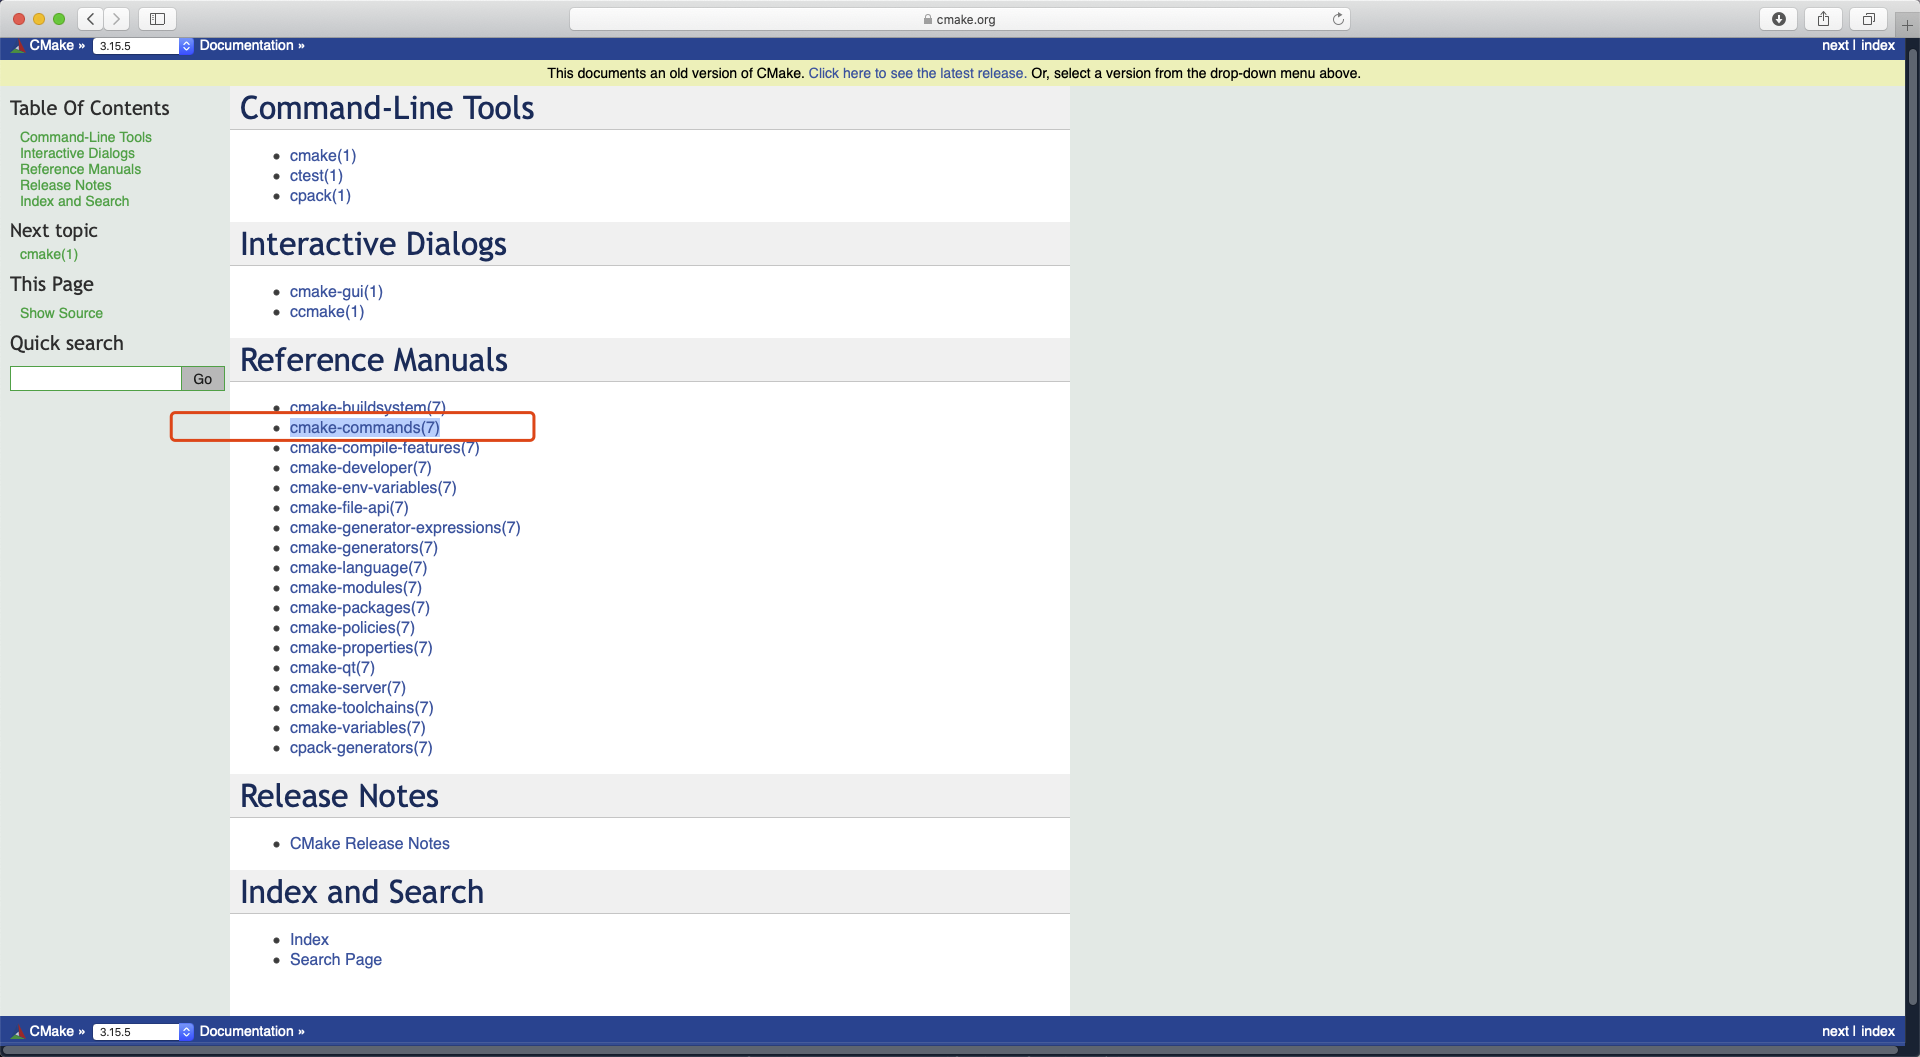

## 命令说明

- cmake的命令分成4类,其中最常用的命令2类：
    - `Project Commands`
        - 用来完成一些项目工程有关的操作；
    - `Scripting Commands`
        - 用来控制项目工程的操作，包含执行流程选择，执行流程循环；

## 完整并独立的CMake配置例子

### 第一步：创建CMakeLists.txt文件名，作为CMake的配置

- 文件名一定是CMakeLists.txt，与代码在一个目录，下面是CMakeLists.txt文件内容

```bash
    cmake_minimum_required(VERSION 3.15)
    project(main)
    set(CMAKE_INCLUDE_CURRENT_DIR ON)  
    set(CMAKE_CXX_STANDARD 11)
    set(CMAKE_CXX_STANDARD_REQUIRED True)
    SET(CMAKE_PREFIX_PATH /Users/yangqiang/Qt512/5.12.1/clang_64/lib/cmake)
    find_package(Qt5Core REQUIRED)
    FIND_PACKAGE(Qt5Widgets REQUIRED)
    FIND_PACKAGE(Qt5Gui REQUIRED)
    FIND_PACKAGE(Qt5Core REQUIRED)

    SET(CMAKE_AUTOMOC ON)
    SET(CMAKE_AUTOUIC ON)

    qt5_wrap_ui(UI_FILES output.ui)


    message(STATUS "编译Qt...")
    aux_source_directory(. SOURCES)
    add_executable(main ${SOURCES} ${UI_FILES})


    include_directories(
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtCore
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/GtGui
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QThread
    )
    find_library(FRAMEWORK1  QtCore /Users/yangqiang/Qt512/5.12.1/clang_64/lib)
    find_library(FRAMEWORK2  QtGui /Users/yangqiang/Qt512/5.12.1/clang_64/lib)
    find_library(FRAMEWORK3  QtWidgets /Users/yangqiang/Qt512/5.12.1/clang_64/lib)
    target_link_libraries(main ${FRAMEWORK1} ${FRAMEWORK2} ${FRAMEWORK3})

```

### 第二步：创建一个CMake工作目录

- 一般是在CMakeLists.txt所在目录建一个目录，可以是任意合法的目录名，建议build与release,debug也行。

### 第三步：进入工作目录，调用cmake

- 进入创建好的工作目录，比如build。


### 调用cmake生成makefile

- 在目录中执行`cmake CMakeLists.txt所在目录`，如果工作目录与CMakeLists.txt在一个目录，可以如下执行：
    - `cmake ..`
    
- cmake最终的结果是生成Makefile文件。

### 第四部：使用make编译与安装

1. 编译：`make`
2. 安装：`make install`
3. 清空：`make clean`

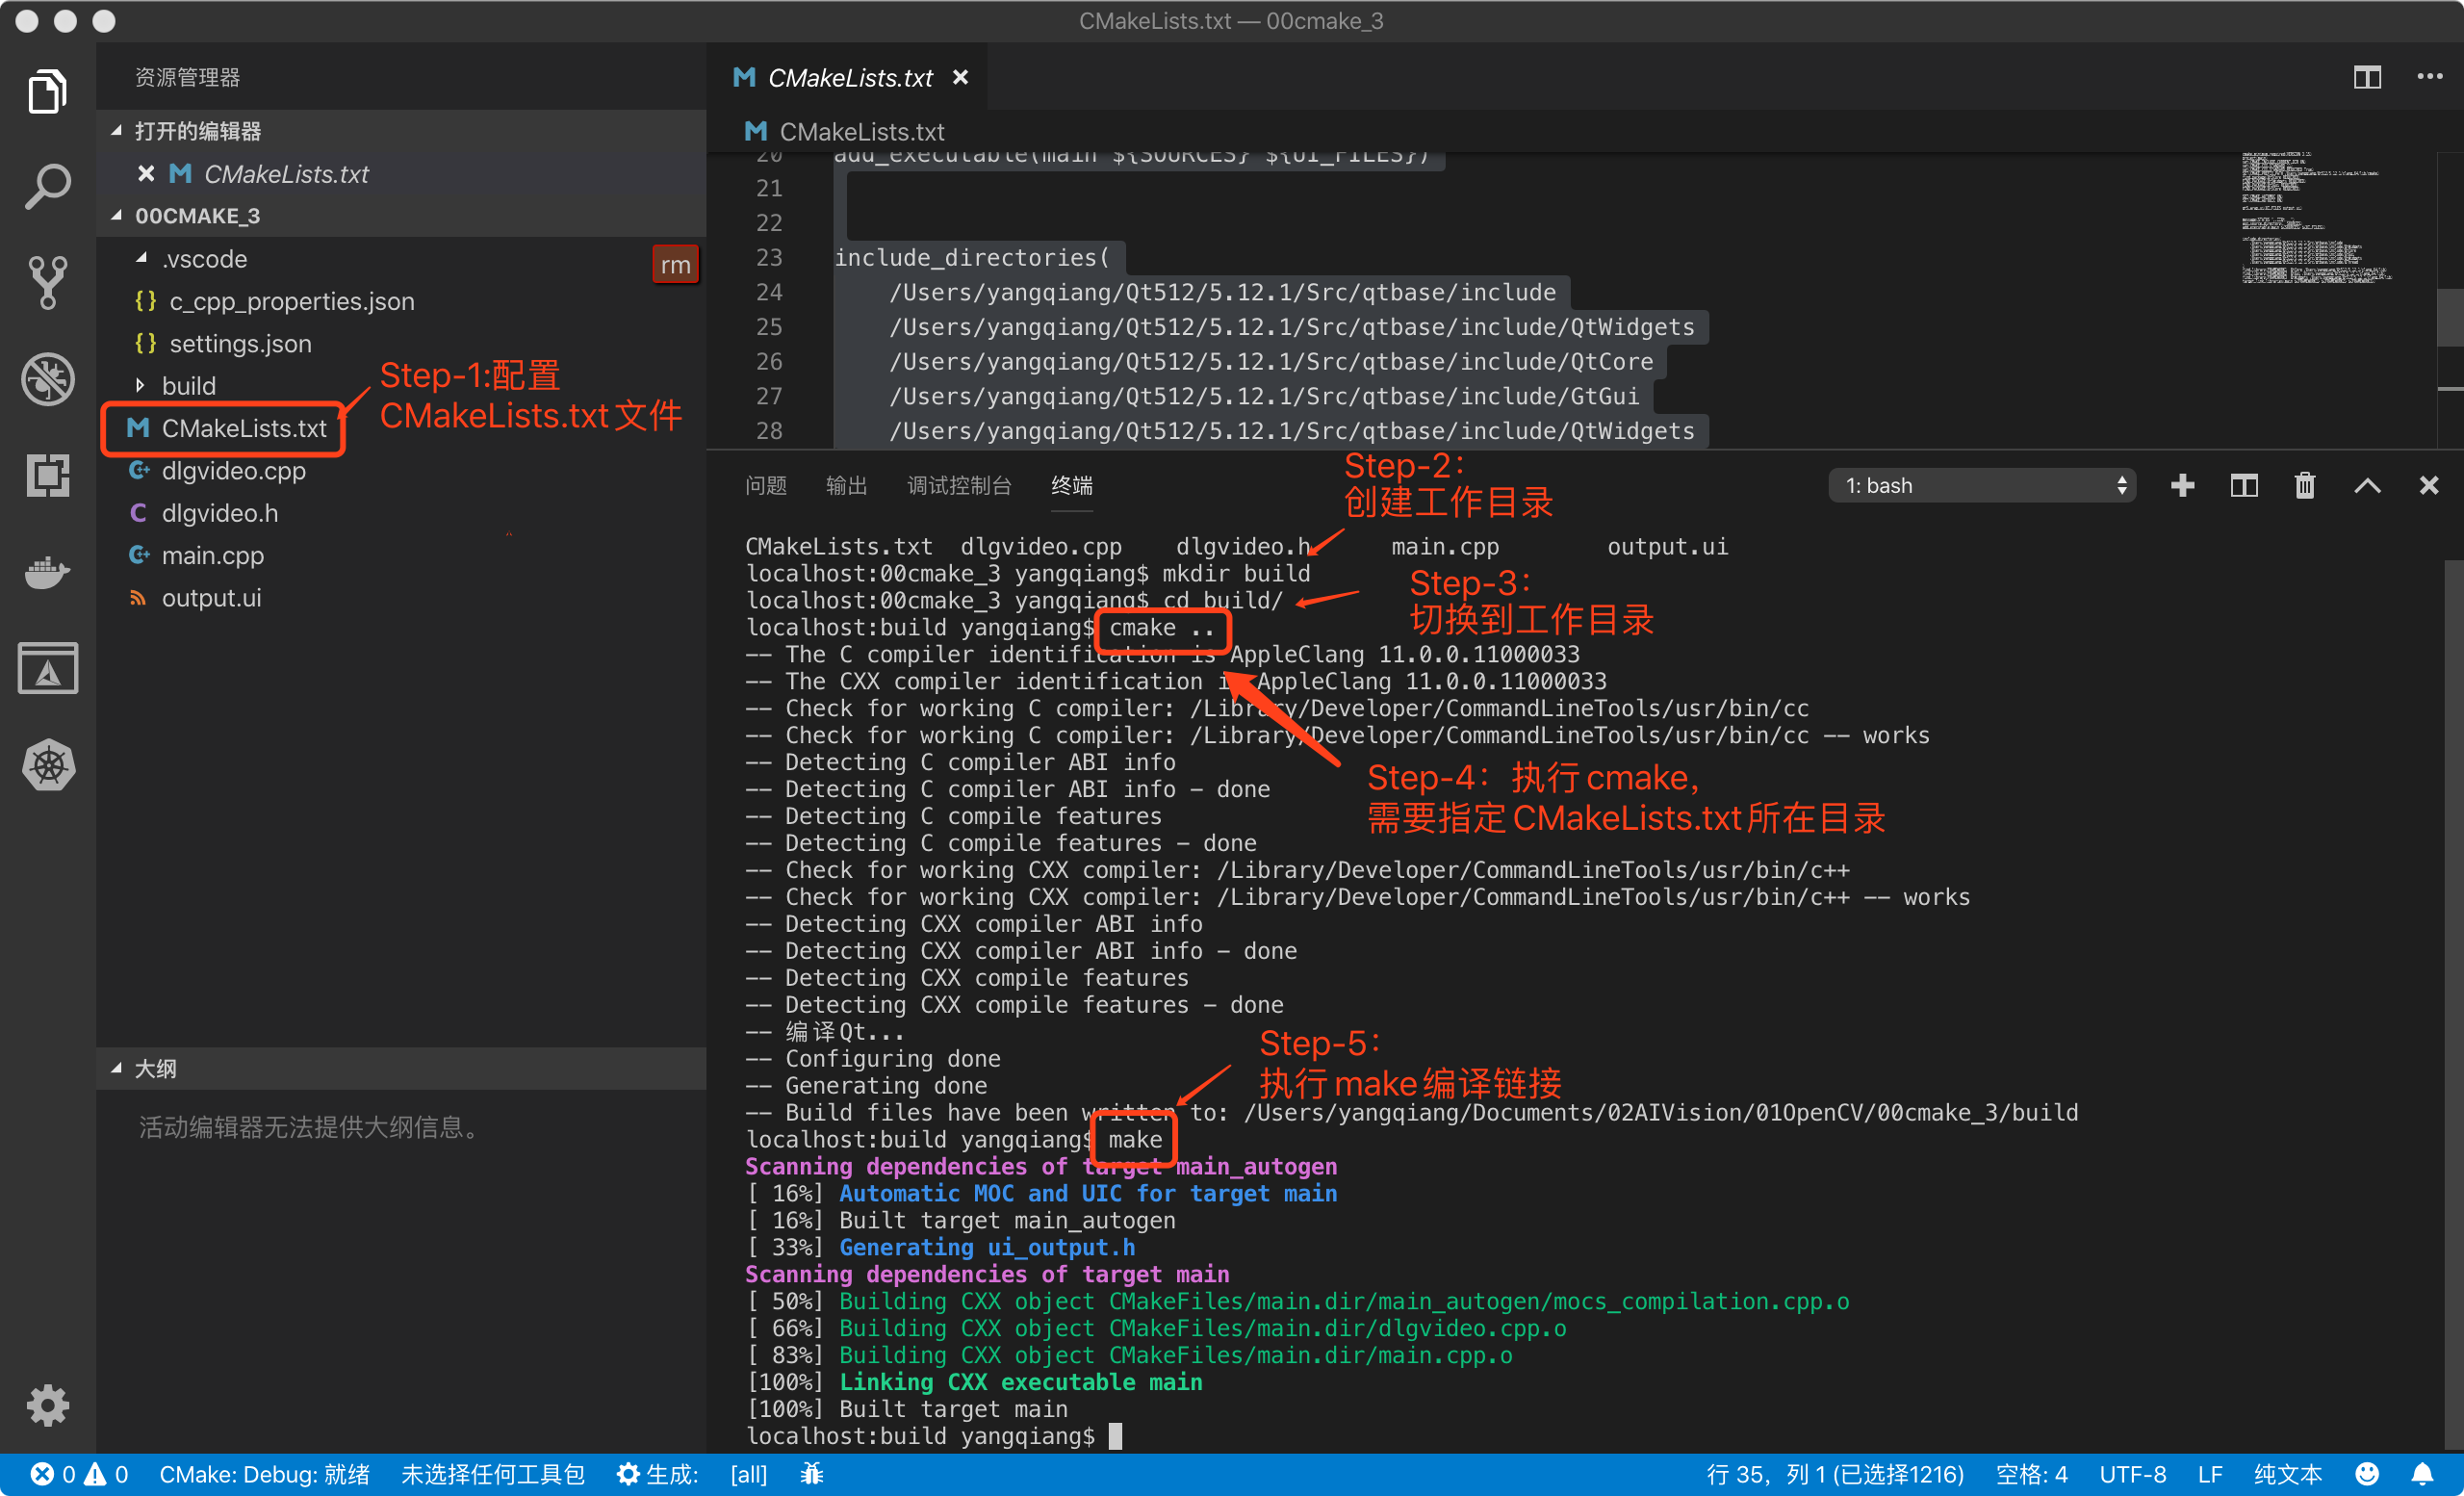

## 脚本命名：`Scripting Command`

### 设置版本限制cmake_minimum_required

- 语法的参考最好参考官方文档，这里仅仅是贴出来方便理解例子

1. 语法
    - `cmake_minimum_required(VERSION <min>[...<max>] [FATAL_ERROR])`
        - 可以指定最小版本与最大版本
        - 版本格式：`major.minor[.patch[.tweak]]`
        - FATAL_ERROR在2.6以后已经忽略。
        - 如果cmake版本低于min，则终止运行；
        - max设置会影响老版本的使用，可以使用cmake_policy指定。max不是限制cmake使用。但执行规则会按照cmake_policy指定版本的规则，不会使用高版本的功能。

2. 例子
    - `cmake_minimum_required(VERSION 3.15)`
        - 这里只指定最小版本

### 设置变量set

1. 语法
    - `set(<variable> <value>... [PARENT_SCOPE])`
        - 这是一个经常使用的命令，因为设置的变量会影响到cmake的工作。

2. 例子
    - `set(CMAKE_CXX_STANDARD 11)`
        - 设置的变量CMAKE_CXX_STANDARD，用来指定C++版本。这个会在g++编译器添加 `-std=c++11选项`；
    - `set(CMAKE_CXX_STANDARD_REQUIRED True)`
        - 标准C++语法。

### 显示信息message

1. 语法
    - `message([<mode>] "message to display" ...)`
        - 使用指定的mode，显示字符串信息，
        - 其中的mode包含（mode意义可以通过英文字面意思理解，表示信息的警告级别）：
            - FATAL_ERROR
                - 停止执行，产生提示；
            - SEND_ERROR
                - 停止执行，不产生提示；
            - WARNING
                - 警告，继续执行；
            - AUTHOR_WARNING
                - 警告（开发时），继续执行；
            - DEPRECATION
                - 不推荐提示，受CMAKE_ERROR_DEPRECATED与CMAKE_WARN_DEPRECATED影响；
            - (none) or NOTICE
                - 重要信息，输出到stderr，吸引用户注意力；
            - STATUS
                - 执行的状态信息；
            - VERBOSE
                - 提供更加详细的输出信息-就是提供一些用户没有兴趣的额外信息；
            - DEBUG
                - 调试信息，主要对开发者调试有用；
            - TRACE
                - 跟踪信息，提供底层的信息输出；

2. 例子
    - `essage(STATUS "编译Qt...")`

## 项目命令：`Project Commands`

### 设置项目名project

1. 语法


```bash

project(<PROJECT-NAME> [<language-name>...])
project(<PROJECT-NAME>
        [VERSION <major>[.<minor>[.<patch>[.<tweak>]]]]
        [DESCRIPTION <project-description-string>]
        [HOMEPAGE_URL <url-string>]
        [LANGUAGES <language-name>...])
        
```

2. 例子
    - `project(main)`

### 得到项目目录aux_source_directory

- 自动获取指定目录`<dir>`下的文件，并存入`<variable>`变量，通过`<variable>`变量就可以使用这些原文件（.cpp文件）

1. 语法
    - `aux_source_directory(<dir> <variable>)`

2. 例子
    - `aux_source_directory(. SOURCES)`
        - `.`当前目录下的cpp文件都会存储在SOURCES变量。

### 设置编译的输出文件add_executable

1. 语法

    - 指定编译链接的执行文件名，可以指定相关编译链接参数。

```bash
    add_executable(<name> [WIN32] [MACOSX_BUNDLE]
                   [EXCLUDE_FROM_ALL]
                   [source1] [source2 ...])
```

2. 例子
    - `add_executable(main ${SOURCES} ${UI_FILES})`
        - 可以指定多个cpp变量，Qt的ui也在这儿设置到编译范围。

### 设置头文件include_directories

- include_directories等价于编译器的`-I`选项

- 头文件相关的还有find_path，find_path是脚本命令，用来辅助返回某个头文件存在的目录
    - 语法：`find_path (<VAR> name1 [path1 path2 ...])`
    - 例子：`find_path(INCLUDES opencv2/opencv.hpp /usr/local/include/opencv4/)`

1. 语法
    - `include_directories([AFTER|BEFORE] [SYSTEM] dir1 [dir2 ...])`
        - include_directories的参数使用变量，可以使用生成器表达式`$<...>`（比如标准库路径需要动态使用版本号的时候），当然，也可以使用`${...}`一般变量。

2. 例子
    - 直接使用字符串的例子。

```bash

    include_directories(
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtCore
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/GtGui
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QThread
    )

```

### 设置链接的动态库target_link_libraries

- 动态库的设置在编译器与链接器使用的是两个选项：
    - `-L`:指定目录
    - `-l`:指定动态库名（去掉lib前缀、`.so`,`dylib`,`dll`后缀、版本号）
- 因为在cmake中使用find_library，返回的是动态库的全路径，-L就不需要指定。
    - find_library属于脚本命令

1. find_library语法
    - 简易语法：`find_library (<VAR> name1 [path1 path2 ...])`

```bash

    find_library (
              <VAR>
              name | NAMES name1 [name2 ...] [NAMES_PER_DIR]
              [HINTS path1 [path2 ... ENV var]]
              [PATHS path1 [path2 ... ENV var]]
              [PATH_SUFFIXES suffix1 [suffix2 ...]]
              [DOC "cache documentation string"]
              [NO_DEFAULT_PATH]
              [NO_PACKAGE_ROOT_PATH]
              [NO_CMAKE_PATH]
              [NO_CMAKE_ENVIRONMENT_PATH]
              [NO_SYSTEM_ENVIRONMENT_PATH]
              [NO_CMAKE_SYSTEM_PATH]
              [CMAKE_FIND_ROOT_PATH_BOTH |
               ONLY_CMAKE_FIND_ROOT_PATH |
               NO_CMAKE_FIND_ROOT_PATH]
             )

```

2. find_library例子
    - `find_library(LIB1  opencv_core)`

3. target_link_libraries语法
    - `target_link_libraries(<target> ... <item>... ...)`
        - 也支持生成器表达式的使用。
    

4. target_link_libraries例子
    - `target_link_libraries(main ${LIB1} ${LIB2} ${LIB3} ${LIB4})`
        - 提示：这个命令需要在add_executable后使用。

### 关于mac下的framework

- MAC OS X中动态库也使用Framework，在cmake中Framework与so、dylib是无差别的。
    - 查找：`find_library(FRAMEWORK1  QtCore /Users/yangqiang/Qt512/5.12.1/clang_64/lib)`
    - 添加：`target_link_libraries(main ${FRAMEWORK1} ${FRAMEWORK2} ${FRAMEWORK3})`

# CMake的OpenCV配置

- OpenCV的配置分成3步：
    1. 确定OpenCV的安装目录，及其头文件位置与库文件位置（如果是在系统目录，可以不用这个信息）
    2. 使用find_path确定头文件目录
    3. 使用include_directories添加头文件目录
    4. 使用find_library确定库文件所在目录
    5. 使用target_link_libraries添加库文件


```bash
    cmake_minimum_required(VERSION 3.15)
    project(main)
    set(CMAKE_CXX_STANDARD 11)
    set(CMAKE_CXX_STANDARD_REQUIRED True)
    message(STATUS "编译OpenCV...")
    # 1. 头文件目录
    find_path(INCLUDES opencv2/opencv.hpp /usr/local/include/opencv4/)
    # 3. 库文件目录
    find_library(LIB1  opencv_core)
    find_library(LIB2  opencv_imgcodecs)
    find_library(LIB3  opencv_imgproc)
    find_library(LIB4  opencv_ml)
    # 2. 添加头文件
    include_directories(${INCLUDES})
    add_executable(main main.cpp)
    # 4. 添加库目录
    target_link_libraries(main ${LIB1} ${LIB2} ${LIB3} ${LIB4})

```

- 实际上，还有其他命令可以达到同样的目的
    - find系列函数
        - find_file
        - find_library
        - find_package
        - find_path
        - find_program
    - target相关设置：
        - target_compile_definitions
        - target_compile_features
        - target_compile_options
        - target_include_directories
        - target_link_directories
        - target_link_libraries
        - target_link_options
        - target_sources

# CMake的Qt配置

- Qt的情况远比OpenCV复杂的多，OpenCV是属于正常的C++编译与链接范畴。但是Qt中需要有三个问题解决
    - ui文件的编译：就是uic的调用；
    - moc文件的编译：就是signals，slots，emit等特殊宏语法的处理（由QOBJECT宏启动）需要moc命令调用；
    - qrc文件的编译：就是rcc的调用；

- 早期CMake提供Qt独有的命名来实现Qt程序的编译链接，在Qt5以后，Qt自己提供宏来实现CMake的编译，

## 第一步：确定Qt的cmake配置所在

- Qt自己提供CMake的配置文件，其中包含编译需要的宏指令。只要指定Qt的CMake的目录，cmake工具会自动搜索，并使用Qt提供的编译指令。
- 使用`CMAKE_PREFIX_PATH`指定Qt的CMake的配置目录；

- 例子：
    - `SET(CMAKE_PREFIX_PATH /Users/yangqiang/Qt512/5.12.1/clang_64/lib/cmake)`
    - 只有CMAKE_PREFIX_PATH变量设置后，Qt相关的宏才能使用。

- 上面例子使用的Qt目录
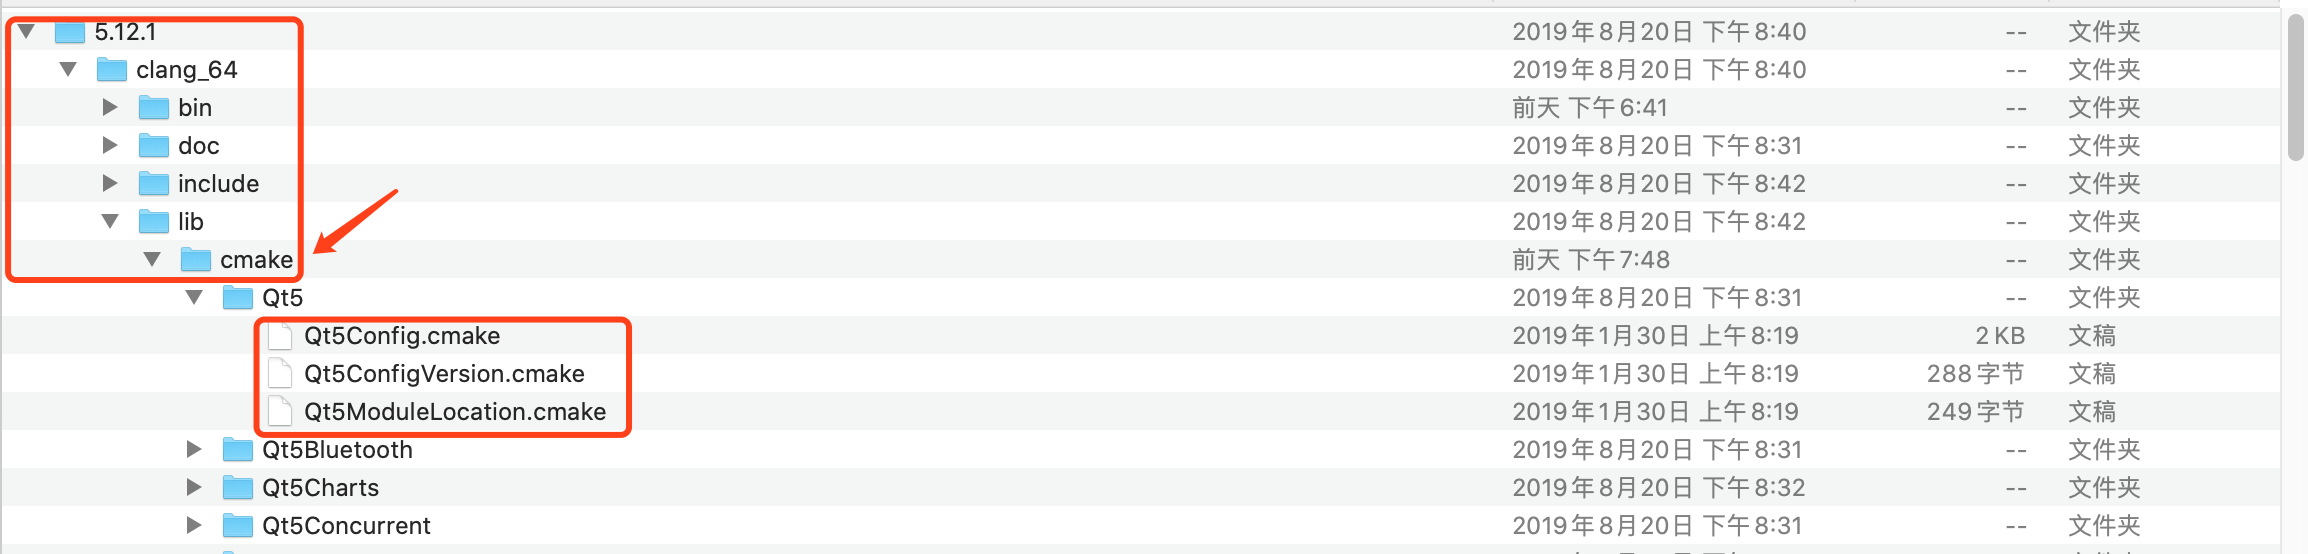

## 第二步：加载相关的模块

### find_package命令

```bash
    find_package(<PackageName> [version] [EXACT] [QUIET]
                 [REQUIRED] [[COMPONENTS] [components...]]
                 [CONFIG|NO_MODULE]
                 [NO_POLICY_SCOPE]
                 [NAMES name1 [name2 ...]]
                 [CONFIGS config1 [config2 ...]]
                 [HINTS path1 [path2 ... ]]
                 [PATHS path1 [path2 ... ]]
                 [PATH_SUFFIXES suffix1 [suffix2 ...]]
                 [NO_DEFAULT_PATH]
                 [NO_PACKAGE_ROOT_PATH]
                 [NO_CMAKE_PATH]
                 [NO_CMAKE_ENVIRONMENT_PATH]
                 [NO_SYSTEM_ENVIRONMENT_PATH]
                 [NO_CMAKE_PACKAGE_REGISTRY]
                 [NO_CMAKE_BUILDS_PATH] # Deprecated; does nothing.
                 [NO_CMAKE_SYSTEM_PATH]
                 [NO_CMAKE_SYSTEM_PACKAGE_REGISTRY]
                 [CMAKE_FIND_ROOT_PATH_BOTH |
                  ONLY_CMAKE_FIND_ROOT_PATH |
                  NO_CMAKE_FIND_ROOT_PATH])
```

### 模块加载例子

```bash

    find_package(Qt5Core REQUIRED)
    FIND_PACKAGE(Qt5Widgets REQUIRED)
    FIND_PACKAGE(Qt5Gui REQUIRED)

```

- CMake不区分大小写。

## 第三步：指定编译设置

### moc文件设置

- Qt在CMake中的moc设置非常简化了，基本上是自动检测QOBJECT来完成，开发者需要做的就是开启moc检测；
- 开启方式：
    - `SET(CMAKE_AUTOMOC ON)`

- 也可以使用qt_wrap_moc手工转换
- 也可以在编译时指定moc文件。

### ui文件设置

1. 开启ui的自动编译
    - `SET(CMAKE_AUTOUIC ON)`

2. （可选）手工转换
    - `qt5_wrap_ui(UI_FILES output.ui)`

3. （可选）添加到编译源
    - `add_executable(main ${SOURCES} ${UI_FILES})`

### qrc文件设置

1. 开启资源自动编译
    - `AUTORCC`

2. 设置资源文件
    - `qt5_add_resources(QRC_FILES res.qrc)`

3. 添加资源文件到编译设置
    - `add_executable(main ${UI_FILES} ${QRC_FILES})`

## 完整的配置例子

```bash
    cmake_minimum_required(VERSION 2.15...3.0)
    project(main)
    set(CMAKE_INCLUDE_CURRENT_DIR ON)  
    set(CMAKE_CXX_STANDARD 11)
    set(CMAKE_CXX_STANDARD_REQUIRED True)
    SET(CMAKE_PREFIX_PATH /Users/yangqiang/Qt512/5.12.1/clang_64/lib/cmake)
    find_package(Qt5Core REQUIRED)
    FIND_PACKAGE(Qt5Widgets REQUIRED)
    FIND_PACKAGE(Qt5Gui REQUIRED)

    SET(CMAKE_AUTOMOC ON)
    SET(CMAKE_AUTOUIC ON)

    qt5_wrap_ui(UI_FILES output.ui)

    message(STATUS "编译Qt...")
    aux_source_directory(. SOURCES)
    add_executable(main ${SOURCES} ${UI_FILES})

    include_directories(
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtCore
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/GtGui
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets
        /Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QThread
    )
    find_library(FRAMEWORK1  QtCore /Users/yangqiang/Qt512/5.12.1/clang_64/lib)
    find_library(FRAMEWORK2  QtGui /Users/yangqiang/Qt512/5.12.1/clang_64/lib)
    find_library(FRAMEWORK3  QtWidgets /Users/yangqiang/Qt512/5.12.1/clang_64/lib)
    target_link_libraries(main ${FRAMEWORK1} ${FRAMEWORK2} ${FRAMEWORK3})
    message(STATUS  ${FRAMEWORK3})

```

----